In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

quandl.ApiConfig.api_key = "yvFBQPr3jqiWypuisRMs"

In [20]:
stocks = ['TSLA','KO','AMZN','SCCO','BAP']
data = quandl.get_table('WIKI/PRICES', ticker = stocks,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2020-04-30' }, paginate=True)

In [21]:
stocks_2 = ['NVDA','BLK','TGT','CAT','GDX']
data_2 = quandl.get_table('WIKI/PRICES', ticker=stocks_2, 
                         qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2020-04-30' }, paginate=True)

In [43]:
df = pd.concat([data,data_2]).set_index('date')

In [44]:
df = df.pivot(columns='ticker')
df.columns = [col[1] for col in df.columns]

### Calculating the Sharpe Ratio of our portfolio

In [138]:
#We will create a function to calculate the sharpe ratio.
def calculate_returns_sharpe_ratio(df,weights,total_investment=10000):
    sharpe_dict = dict()
    for weight,stock in zip(weights,df.columns):
        norm_returns = df[stock]/df[stock].iloc[0]
        position = norm_returns*weight*total_investment
        sharpe_dict['Position_'+stock] = position
    portfolio_position = pd.DataFrame(sharpe_dict).sum(axis=1)
    cumulative_return = 100*(portfolio_position[-1] / portfolio_position[0] - 1)
    #Now we will calculate the sharpe ratio (Mean of returns - risk_free) / Stand.Deviat of portfolio
    daily_return_portfolio = portfolio_position.pct_change()
    sharpe_ratio = (daily_return_portfolio.mean() - 0.003) / daily_return_portfolio.std()
    #Printing results
    print("The cumulative return of the portfolio is: {:.2f} %".format(cumulative_return))
    print("The sharpe ratio of the portfolio is {:.3f}".format(sharpe_ratio))
    return pd.DataFrame(sharpe_dict)

In [165]:
weights = [0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125] #This shoul be edited...
portfolio_position_df = calculate_returns_sharpe_ratio(df,weights)

The cumulative return of the portfolio is: 135.40 %
The sharpe ratio of the portfolio is -0.100


In [167]:
portfolio_position_df

,Position_AMZN,Position_BLK,Position_CAT,Position_KO,Position_NVDA,Position_SCCO,Position_TGT,Position_TSLA
date,,,,,,,,
2016-01-04,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
2016-01-05,1243.720467,1253.227259,1236.946610,1254.422170,1270.080321,1264.127046,1271.923861,1250.111902
2016-01-06,1241.483383,1238.967277,1217.458450,1247.641509,1217.562558,1227.591582,1259.007478,1225.549438
2016-01-07,1192.993611,1184.816872,1175.540521,1227.004717,1169.292555,1196.414653,1255.608430,1206.582069
2016-01-08,1191.247115,1154.983488,1163.590234,1223.761792,1144.192153,1172.544817,1213.120326,1180.564881
...,...,...,...,...,...,...,...,...
2018-03-21,3104.169610,2211.644967,3073.518428,1342.172705,9720.688592,2779.796375,1269.170444,1771.015174
2018-03-22,3030.071116,2114.658125,2897.945168,1334.681508,9458.273801,2703.146663,1246.551923,1729.443624
2018-03-23,2934.818443,2042.956859,2846.456830,1321.259781,9110.994614,2660.840004,1228.276159,1687.144712


We also can see the performance of each stock in our portfolio

Text(0, 0.5, 'price in $')

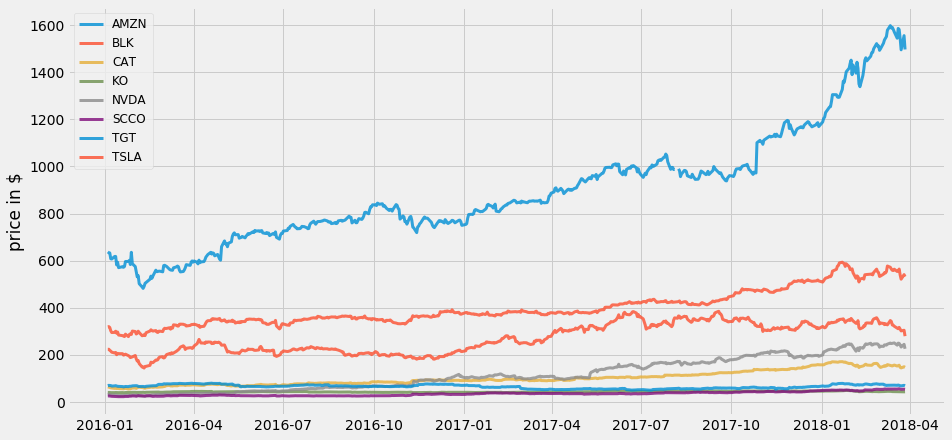

In [152]:
plt.style.use("fivethirtyeight")
register_matplotlib_converters()

plt.figure(figsize=(14,7))
for c in df.columns.values:
    plt.plot(df.index, df[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

## Markowitz efficient frontier portfolio:

By now we just know how our asigned weights perform together in the market, but what if we optimize the weights and get the optimal trade-off between risk-return?


We can do this with Modern Portfolio Theory, but first we can do only with iterations over a range of weights, and then measure the results getting the "optimal" portfolio inside this range of weights. 

In [168]:
#We will use this dataframe to get the values and simulate the performance.
portfolio_position_df.head()

,Position_AMZN,Position_BLK,Position_CAT,Position_KO,Position_NVDA,Position_SCCO,Position_TGT,Position_TSLA
date,,,,,,,,
2016-01-04,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
2016-01-05,1243.720467,1253.227259,1236.946610,1254.422170,1270.080321,1264.127046,1271.923861,1250.111902
2016-01-06,1241.483383,1238.967277,1217.458450,1247.641509,1217.562558,1227.591582,1259.007478,1225.549438
2016-01-07,1192.993611,1184.816872,1175.540521,1227.004717,1169.292555,1196.414653,1255.608430,1206.582069
2016-01-08,1191.247115,1154.983488,1163.590234,1223.761792,1144.192153,1172.544817,1213.120326,1180.564881


In [180]:
import numpy as np
def get_simulation_of_portfolio(position_df, iterations = 6000, seed = 328):
    np.random.seed(seed)
    all_weights = np.zeros((iterations, len(position_df.columns))) #We define the array of future positions
    returns_array = np.zeros(iterations)
    volatility_array = np.zeros(iterations)
    sharpe_array = np.zeros(iterations)
    #We will measure the pct_change of the stocks.
    position_df = position_df.pct_change().dropna()
    for i in range(iterations):
        #We will randomize the weights and then normalize (from 0 to 1) with respect to the sum.
        weights = np.array(np.random.random(len(position_df.columns)))
        weights = weights/np.sum(weights)
        
        #We will save weights in the upside array. 
        all_weights[i,:] = weights 
        
        #And the expected return is: The sum of every expected return of the stock * weigths * the days of investment.
        returns_array[i] = np.sum( (position_df.mean() * weights)) * position_df.shape[0]
        
        #Now the expected volatily.
        volatility_array[i] = np.sqrt(np.dot(weights.T, np.dot(position_df.cov()*position_df_.shape[0], weights)))
    print(all_weights)

In [181]:
get_simulation_of_portfolio(portfolio_position_df)

[[0.04942672 0.0520479  0.01777119 ... 0.16948939 0.18719932 0.19973941]
 [0.16474405 0.0194135  0.24822879 ... 0.13192017 0.08915668 0.17021592]
 [0.17909282 0.14604668 0.0565636  ... 0.02479367 0.19837649 0.05424704]
 ...
 [0.14335136 0.07867837 0.13052199 ... 0.19874085 0.1078762  0.10632564]
 [0.08194184 0.09034444 0.11930043 ... 0.07400231 0.13461289 0.18947982]
 [0.27175295 0.00509708 0.07405583 ... 0.14680412 0.2958007  0.03536909]]


In [186]:
portfolio_position_df.pct_change().cov()

,Position_AMZN,Position_BLK,Position_CAT,Position_KO,Position_NVDA,Position_SCCO,Position_TGT,Position_TSLA
Position_AMZN,0.000266,0.000061,0.000065,0.000030,0.000135,0.000043,0.000002,0.000118
Position_BLK,0.000061,0.000183,0.000126,0.000033,0.000101,0.000119,0.000062,0.000076
Position_CAT,0.000065,0.000126,0.000251,0.000026,0.000099,0.000158,0.000055,0.000090
Position_KO,0.000030,0.000033,0.000026,0.000062,0.000034,0.000019,0.000018,0.000026
Position_NVDA,0.000135,0.000101,0.000099,0.000034,0.000769,0.000079,0.000055,0.000201
Position_SCCO,0.000043,0.000119,0.000158,0.000019,0.000079,0.000333,0.000055,0.000077
Position_TGT,0.000002,0.000062,0.000055,0.000018,0.000055,0.000055,0.000296,0.000021
Position_TSLA,0.000118,0.000076,0.000090,0.000026,0.000201,0.000077,0.000021,0.000554


In [182]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([1,0,1])

In [184]:
np.dot(np.dot(a,b),4)

array([16, 40])

In [173]:
portfolio_position_df.pct_change()

,Position_AMZN,Position_BLK,Position_CAT,Position_KO,Position_NVDA,Position_SCCO,Position_TGT,Position_TSLA
date,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.005024,0.002582,-0.010443,0.003538,0.016064,0.011302,0.017539,0.000090
2016-01-06,-0.001799,-0.011379,-0.015755,-0.005405,-0.041350,-0.028902,-0.010155,-0.019648
2016-01-07,-0.039058,-0.043706,-0.034431,-0.016541,-0.039645,-0.025397,-0.002700,-0.015477
2016-01-08,-0.001464,-0.025180,-0.010166,-0.002643,-0.021466,-0.019951,-0.033839,-0.021563
...,...,...,...,...,...,...,...,...
2018-03-21,-0.002931,0.011910,0.011294,-0.003707,-0.004087,0.013244,-0.019843,0.019256
2018-03-22,-0.023871,-0.043853,-0.057125,-0.005581,-0.026995,-0.027574,-0.017821,-0.023473
2018-03-23,-0.031436,-0.033907,-0.017767,-0.010056,-0.036717,-0.015651,-0.014661,-0.024458


#### Bibliography:

- https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805
- https://towardsdatascience.com/python-markowitz-optimization-b5e1623060f5
- 